* In this example, we try to suppress the dispersion of a FODO cell by varing the angle of quadrupole

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from elegantIO import elegantLatticeFile
from elegantIO import elegant_findtwiss

In [2]:
fodo_lattice=elegantLatticeFile()
fodo_lattice.addElement('bend', 'CSBEND', l=2.0, angle=0.1)
fodo_lattice.addElement('qfh', 'kquad', l=0.5, k1=0.5)
fodo_lattice.addElement('qdh', 'kquad', l=0.5, k1=-0.5)
fodo_lattice.addElement('df', 'edrift', l=0.2)

fodo_lattice.appendToBeamline('oo', 'df', 'bend','df')
fodo_lattice.appendToBeamline('fodo', 'qfh', 'oo','qdh','qdh','oo','qfh')
fodo_lattice.setUseLine()
fodo_lattice.useline

'FODO'

In [3]:
twiss_list, twiss_parameter=elegant_findtwiss(fodo_lattice,matched=1)

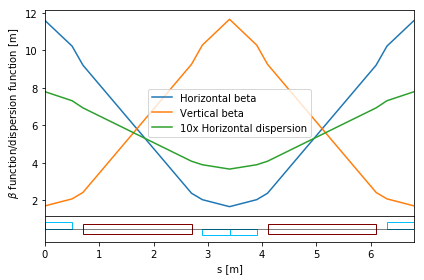

In [4]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[1], label='Horizontal beta')
ax1.plot(twiss_list[0], twiss_list[6], label='Vertical beta')
ax1.plot(twiss_list[0], twiss_list[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

In [5]:
end_twiss=twiss_list[[1,2,4,5,6,7,9,10],-1]
end_twiss

array([ 1.16026688e+01, -2.77555756e-16,  7.79957237e-01,  3.33066907e-16,
        1.70293221e+00, -3.33066907e-16,  0.00000000e+00,  0.00000000e+00])

In [6]:
fodo_copies=5
lines=[]
dispersion_suppress=elegantLatticeFile()
for i in range(fodo_copies):
    line_name=dispersion_suppress.loadALine(fodo_lattice, 'fodo', suffix='_{}'.format(i+1))
    lines.append(line_name)
dispersion_suppress.appendToBeamline('total_line', *lines)

angle=fodo_lattice.getElementProperties('bend','angle')

for i in range(fodo_copies-2, fodo_copies):
    dispersion_suppress.modifyElement('bend_{}'.format(i+1), angle=angle/2.0)
dispersion_suppress.setUseLine('total_line')
twiss_list, twiss_parameter=elegant_findtwiss(dispersion_suppress, matched=0, initial_optics=end_twiss)

The line OO is already in the target
The line OO is already in the target
The line OO is already in the target
The line OO is already in the target
The line OO is already in the target


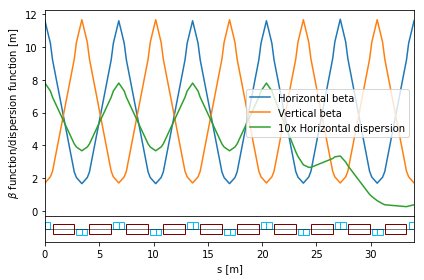

In [7]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
dispersion_suppress.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[1], label='Horizontal beta')
ax1.plot(twiss_list[0], twiss_list[6], label='Vertical beta')
ax1.plot(twiss_list[0], twiss_list[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

0.28103091502082805
The line OO is already in the target
The line OO is already in the target
The line OO is already in the target
The line OO is already in the target


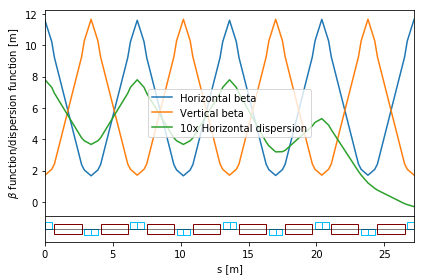

In [8]:
fodo_copies=4
angle=fodo_lattice.getElementProperties('bend','angle')
phi=twiss_list[[3],-1]
param=1.0/2.0/(1-np.cos(phi))[0]
angle1=angle*param
angle2=angle-angle1
print(param)

lines=[]
dispersion_suppress2=elegantLatticeFile()
for i in range(fodo_copies):
    line_name=dispersion_suppress2.loadALine(fodo_lattice, 'fodo', suffix='_{}'.format(i+1))
    lines.append(line_name)
dispersion_suppress2.appendToBeamline('total_line', *lines)



i=fodo_copies-1
dispersion_suppress2.modifyElement('bend_{}'.format(i+1), angle=angle1)
i=fodo_copies-2
dispersion_suppress2.modifyElement('bend_{}'.format(i+1), angle=angle2)
dispersion_suppress2.setUseLine('total_line')

twiss_list, twiss_parameter=elegant_findtwiss(dispersion_suppress2, matched=0, initial_optics=end_twiss)
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
dispersion_suppress2.plotBeamline(ax2)

ax1.plot(twiss_list[0], twiss_list[1], label='Horizontal beta')
ax1.plot(twiss_list[0], twiss_list[6], label='Vertical beta')
ax1.plot(twiss_list[0], twiss_list[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)